In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [2]:
smart_watch_csv = "datasets/smartwatch_03.csv"

In [3]:
df = pd.read_csv(smart_watch_csv)
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    object 
 5   Original Price                  610 non-null    object 
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 52.5+ KB


In [5]:
def to_float(x):
    return float(x.replace(",", ""))

In [7]:
df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)
df["Discount percentage"] = df["Selling Price"]/df["Original Price"]

/tmp/ipykernel_42580/4013635096.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)


In [8]:
numerical_col = [column for column in df.columns if df[column].dtype != 'object']
continous_col = [column for column in df.columns if df[column].dtype == 'object']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Reviews',
 'Discount percentage']

In [10]:
df_numerical = df[numerical_col]
df_numerical.head(5)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount percentage
0,2499.0,2999.0,4.1,14,NaN,0.833278
1,2099.0,2499.0,4.2,14,NaN,0.839936
2,1722.0,2099.0,3.5,14,NaN,0.820391
3,2469.0,2999.0,4.1,14,NaN,0.823274
4,1799.0,2199.0,4.3,7,NaN,0.818099


In [11]:
df_numerical.isna().sum(), df.duplicated().sum()

(Selling Price                       0
 Original Price                      0
 Rating (Out of 5)                  56
 Average Battery Life (in days)      0
 Reviews                           496
 Discount percentage                 0
 dtype: int64,
 np.int64(4))

In [12]:
df_numerical = df_numerical.drop_duplicates()

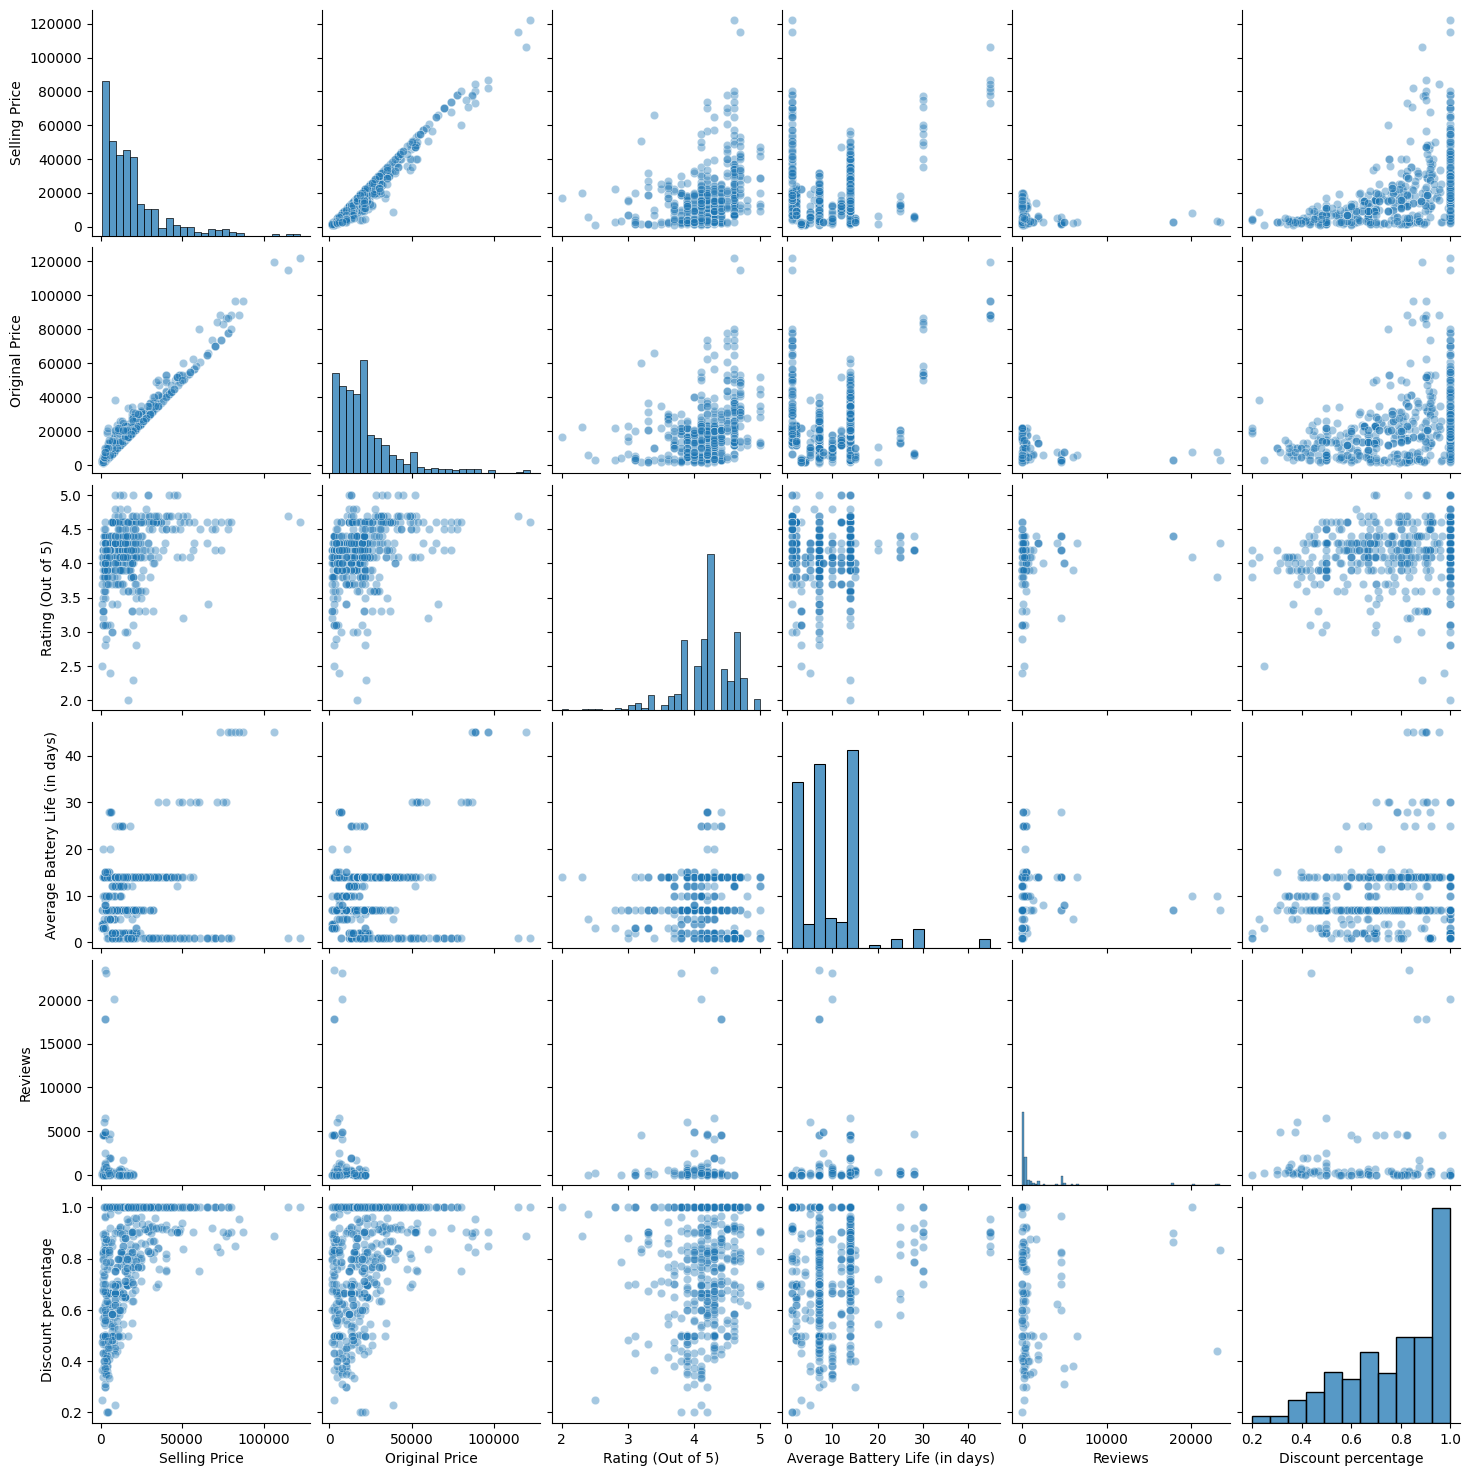

In [13]:
sns.pairplot(data=df_numerical,
             kind="scatter",
             plot_kws={"alpha": 0.4})

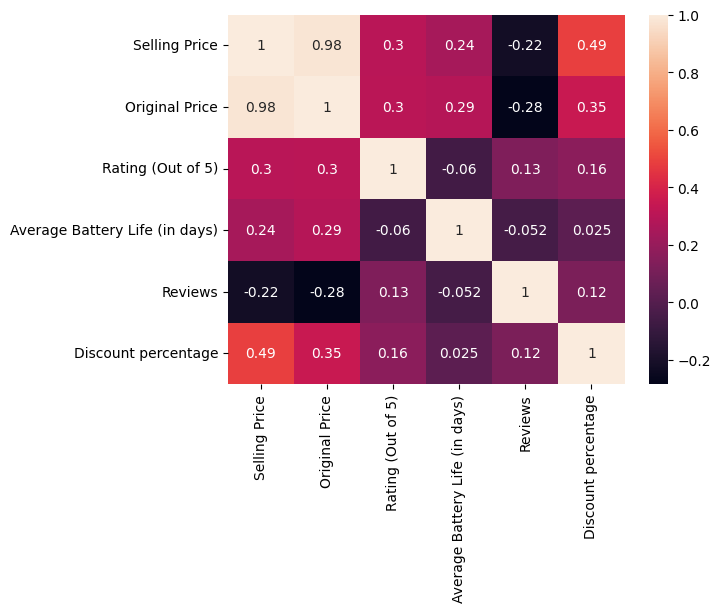

In [14]:
sns.heatmap(df_numerical.corr(), annot=True)
plt.plot(0)

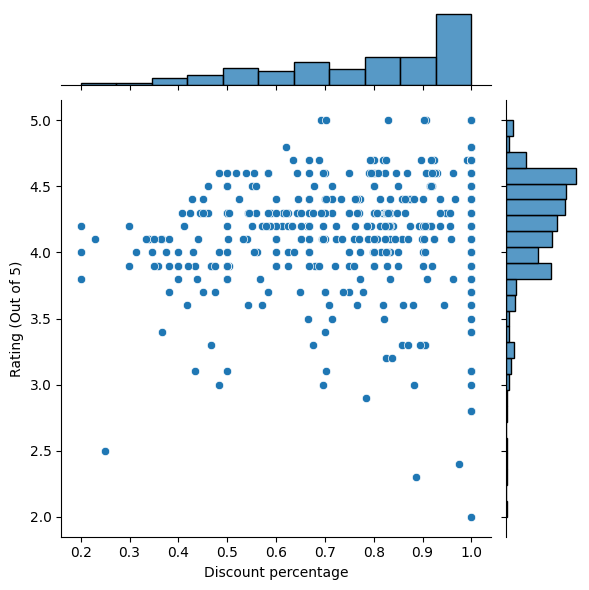

In [15]:
sns.jointplot(data=df_numerical, x=df_numerical['Discount percentage'],
              y=df["Rating (Out of 5)"])

<h4>Feature Engineering</h4>

In [16]:
df = df.copy()

In [17]:
train_df = df.sample(frac=0.8, random_state=43)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [18]:
df.shape, train_df.shape, test_df.shape

((610, 12), (488, 13), (122, 13))

In [19]:
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [20]:
def hundred_to_zero(x):
    if x == 100:
        return x
    else:
        return x

In [21]:
train_df["Discount price"] = train_df['Selling Price'] - train_df['Original Price']
train_df["Average Battery Life (in days)"] = train_df["Average Battery Life (in days)"].astype(float)
train_df["Reviews"] = train_df["Reviews"].astype(float)
train_df['Discount percentage'] = train_df['Discount percentage'] * 100
train_df['Discount percentage'] = train_df['Discount percentage'].apply(lambda x: hundred_to_zero(x))
train_df.drop("Discount percentage", axis=1, inplace=True)
train_df.head(5)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews,Discount price
0,APPLE,Smartwatch,2 - 42 mm Silver Aluminium Case,Pearl Woven,34900.0,34900.0,OLED Retina Display,4.7,Aluminium,1.0,NaN,0.0
1,GARMIN,Smartwatch,Venu,Black,32990.0,39990.0,LED Display,4.0,Silicone,14.0,NaN,-7000.0
2,FitBit,FitnessBand,Charge 3,Grey,7599.0,13999.0,OLED Display,4.3,Silicone,7.0,NaN,-6400.0
3,APPLE,Smartwatch,"Series 7 GPS + Cellular, 45 mm Stainless Steel",Black,77900.0,77900.0,OLED Retina Display,4.6,Stainless Steel,1.0,NaN,0.0
4,FOSSIL,Smartwatch,Charter Hybrid HR,Gold,13196.0,16495.0,AMOLED Display,3.9,Leather,12.0,4.0,-3299.0


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      488 non-null    object 
 1   Device Type                     488 non-null    object 
 2   Model Name                      488 non-null    object 
 3   Color                           488 non-null    object 
 4   Selling Price                   488 non-null    float64
 5   Original Price                  488 non-null    float64
 6   Display                         488 non-null    object 
 7   Rating (Out of 5)               447 non-null    float64
 8   Strap Material                  488 non-null    object 
 9   Average Battery Life (in days)  488 non-null    float64
 10  Reviews                         89 non-null     float64
 11  Discount price                  488 non-null    float64
dtypes: float64(6), object(6)
memory usag

In [23]:
numerical_col = [column for column in train_df.columns if train_df[column].dtype == 'float64']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Reviews',
 'Discount price']

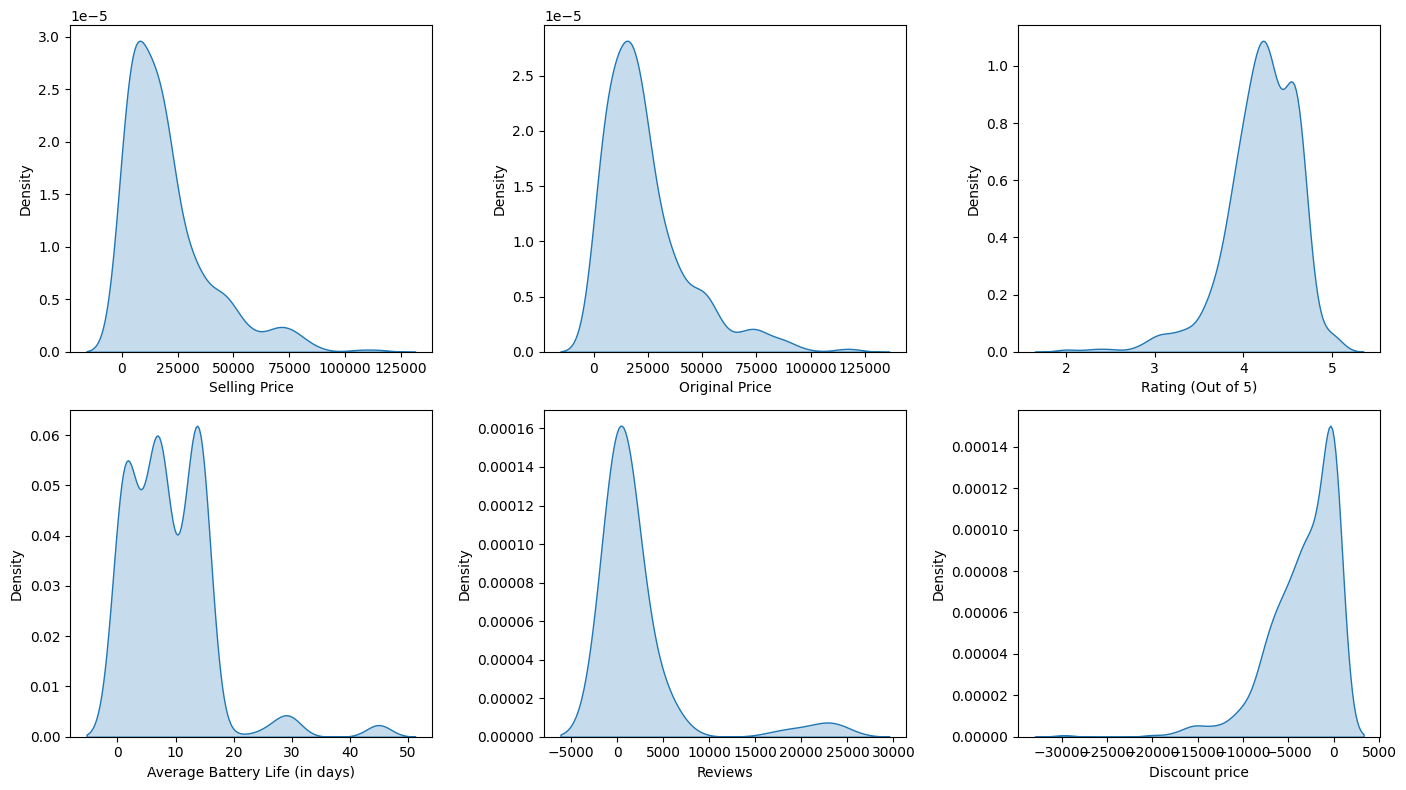

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)
    
fig.tight_layout()
plt.show()

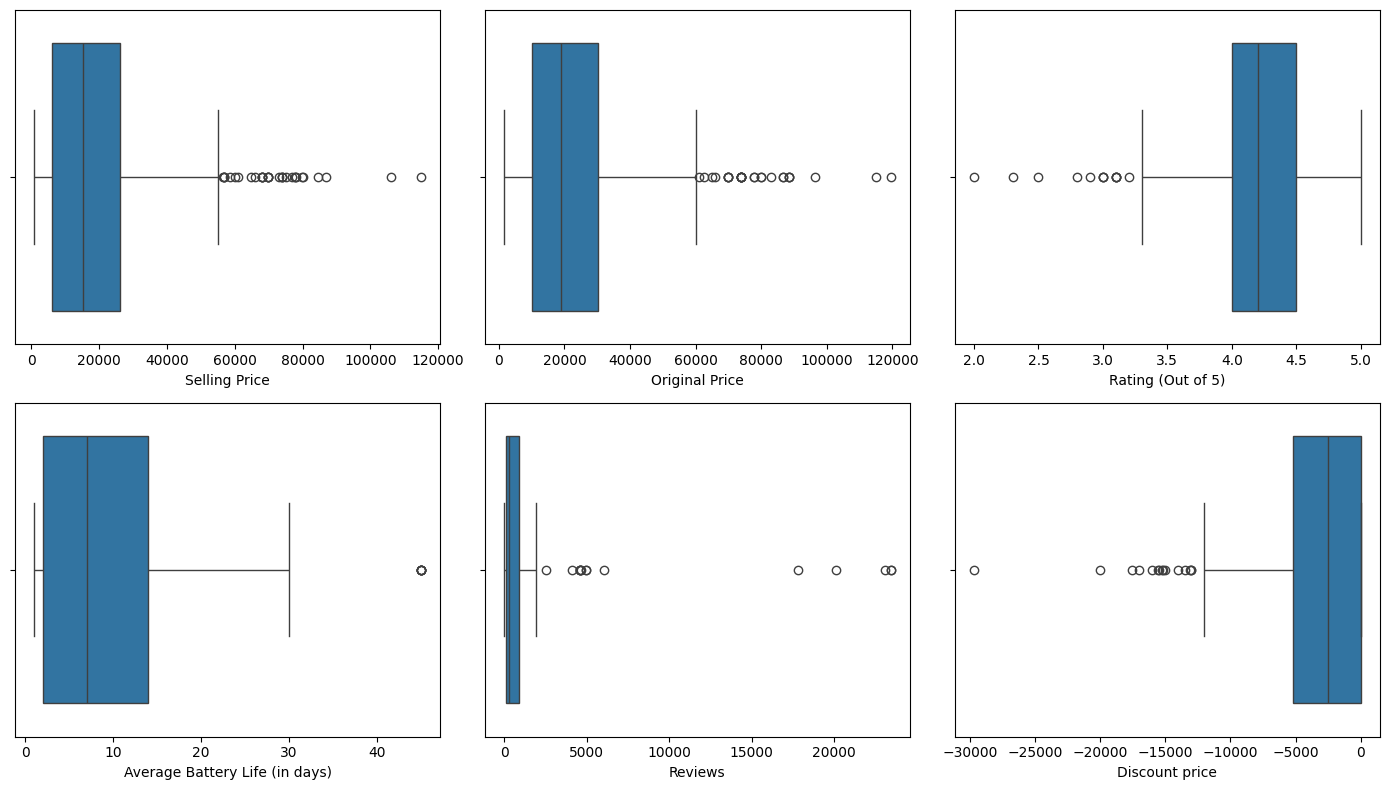

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()

In [26]:
def remove_outlier_IQR(data: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Removes outliers from a DataFrame column using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    col (str): The column name for which to remove outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    if col not in data.columns:
        print(f"Column {col} does not exist in the DataFrame.")
        return data
    
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"Column {col} is not numeric and cannot be processed.")
        return data

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"Processing column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    removed_outliers_count = len(data) - len(filtered_data)
    print(f"Removed {removed_outliers_count} outliers from column: {col}")
    
    return filtered_data

In [29]:
import_col = ['Selling Price', 'Original Price', 'Rating (Out of 5)', 'Reviews']
for col in import_col:
    print(f"Removing outliers from column: {col}")
    train_df = remove_outlier_IQR(data=train_df, col=col)

Removing outliers from column: Selling Price
Processing column: Selling Price
Q1: 3499.0, Q3: 10997.75, IQR: 7498.75
Lower bound: -7749.125, Upper bound: 22245.875
Removed 0 outliers from column: Selling Price
Removing outliers from column: Original Price
Processing column: Original Price
Q1: 5999.0, Q3: 16371.0, IQR: 10372.0
Lower bound: -9559.0, Upper bound: 31929.0
Removed 0 outliers from column: Original Price
Removing outliers from column: Rating (Out of 5)
Processing column: Rating (Out of 5)
Q1: 3.9, Q3: 4.3, IQR: 0.3999999999999999
Lower bound: 3.3, Upper bound: 4.8999999999999995
Removed 0 outliers from column: Rating (Out of 5)
Removing outliers from column: Reviews
Processing column: Reviews
Q1: 65.25, Q3: 489.0, IQR: 423.75
Lower bound: -570.375, Upper bound: 1124.625
Removed 7 outliers from column: Reviews


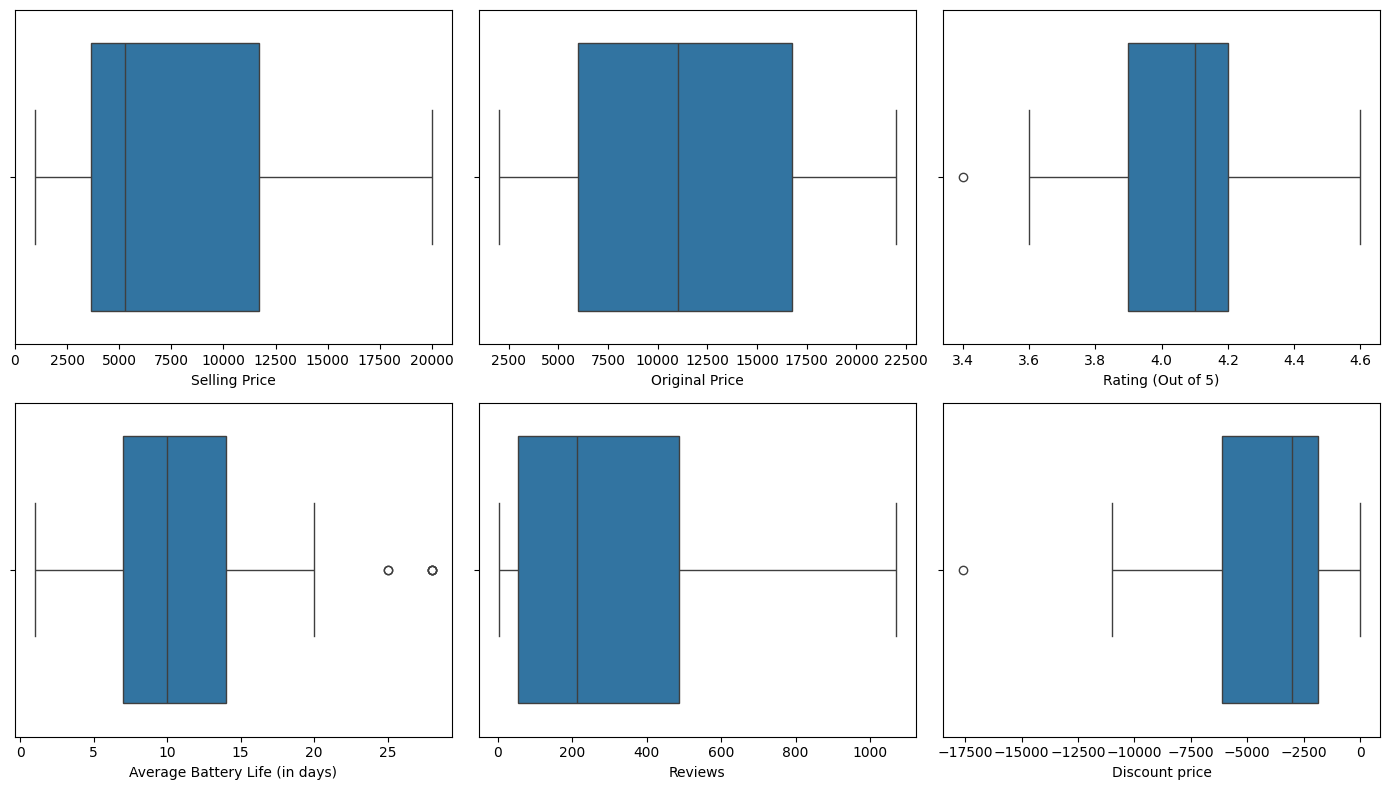

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()

In [ ]:
for col in numerical_col:
    train_df[col].fillna(train_df[col].median(), inplace=True)

In [32]:
train_df[numerical_col].isna().sum()

Selling Price                     0
Original Price                    0
Rating (Out of 5)                 0
Average Battery Life (in days)    0
Reviews                           0
Discount price                    0
dtype: int64

In [33]:
train_df[numerical_col].head()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount price
4,13196.0,16495.0,3.9,12.0,4.0,-3299.0
8,6399.0,7399.0,4.4,28.0,176.0,-1000.0
24,1099.0,3000.0,3.4,7.0,120.0,-1901.0
27,9999.0,16999.0,4.2,12.0,3.0,-7000.0
38,4499.0,9999.0,3.7,10.0,423.0,-5500.0


In [34]:
train_df = train_df.copy()

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [37]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [38]:
data.head()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
0,0.642887,0.724931,0.416667,0.407407,0.000937
1,0.286089,0.270018,0.833333,1.000000,0.162137
2,0.007874,0.050013,0.000000,0.222222,0.109653
3,0.475066,0.750138,0.666667,0.407407,0.000000
4,0.186352,0.400050,0.250000,0.333333,0.393627


In [39]:
data.shape, train_df.shape

((63, 5), (63, 12))

In [40]:
data.isna().sum()

Selling Price                     0
Original Price                    0
Rating (Out of 5)                 0
Average Battery Life (in days)    0
Reviews                           0
dtype: int64

In [41]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [42]:
train_df.head(5)

,Brand Name,Device Type,Model Name,Color,Display,Strap Material,Discount price
4,FOSSIL,Smartwatch,Charter Hybrid HR,Gold,AMOLED Display,Leather,-3299.0
8,huami,Smartwatch,Amazfit Bip,Grey,AMOLED Display,Silicone,-1000.0
24,Ptron,Smartwatch,Rhythm,White,LCD Display,Silicone,-1901.0
27,huami,Smartwatch,Amazfit GTR 42 mm Glitter,White,AMOLED Display,Silicone,-7000.0
38,Fire-Boltt,Smartwatch,AI-BT Calling,"Black, Blue, Grey, Pink",HD Display,Silicone,-5500.0


In [43]:
train_df = pd.concat([train_df, data], axis=1)

In [44]:
train_df

,Brand Name,Device Type,Model Name,Color,Display,Strap Material,Discount price,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
4,FOSSIL,Smartwatch,Charter Hybrid HR,Gold,AMOLED Display,Leather,-3299.0,0.186352,0.400050,0.250000,0.333333,0.393627
8,huami,Smartwatch,Amazfit Bip,Grey,AMOLED Display,Silicone,-1000.0,0.149606,0.400050,0.583333,0.333333,0.296157
24,Ptron,Smartwatch,Rhythm,White,LCD Display,Silicone,-1901.0,0.000000,0.000000,0.250000,0.074074,0.012184
27,huami,Smartwatch,Amazfit GTR 42 mm Glitter,White,AMOLED Display,Silicone,-7000.0,0.238845,0.199550,0.666667,1.000000,0.455483
38,Fire-Boltt,Smartwatch,AI-BT Calling,"Black, Blue, Grey, Pink",HD Display,Silicone,-5500.0,0.055118,0.149987,0.500000,0.333333,0.641987
...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238845,0.250013,0.666667,1.000000,0.162137
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873858,1.000000,0.416667,0.481481,0.040300
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425092,0.800150,0.750000,0.222222,0.260544
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081365,0.124981,1.000000,0.222222,0.035614


In [45]:
train_df[numerical_col]

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount price
4,0.186352,0.400050,0.250000,0.333333,0.393627,-3299.0
8,0.149606,0.400050,0.583333,0.333333,0.296157,-1000.0
24,0.000000,0.000000,0.250000,0.074074,0.012184,-1901.0
27,0.238845,0.199550,0.666667,1.000000,0.455483,-7000.0
38,0.055118,0.149987,0.500000,0.333333,0.641987,-5500.0
...,...,...,...,...,...,...
57,0.238845,0.250013,0.666667,1.000000,0.162137,NaN
58,0.873858,1.000000,0.416667,0.481481,0.040300,NaN
59,0.425092,0.800150,0.750000,0.222222,0.260544,NaN
60,0.081365,0.124981,1.000000,0.222222,0.035614,NaN


In [50]:
categorical_col = [column for column in df.columns if df[column].dtype == 'object']
train_df[categorical_col]

,Brand Name,Device Type,Model Name,Color,Display,Strap Material
4,FOSSIL,Smartwatch,Charter Hybrid HR,Gold,AMOLED Display,Leather
8,huami,Smartwatch,Amazfit Bip,Grey,AMOLED Display,Silicone
24,Ptron,Smartwatch,Rhythm,White,LCD Display,Silicone
27,huami,Smartwatch,Amazfit GTR 42 mm Glitter,White,AMOLED Display,Silicone
38,Fire-Boltt,Smartwatch,AI-BT Calling,"Black, Blue, Grey, Pink",HD Display,Silicone
...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
train_df["Device Type"].value_counts()

Device Type
Smartwatch    63
Name: count, dtype: int64

In [55]:
categorical_col.remove('Device Type')

In [56]:
from scipy.stats import f_oneway

In [59]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount price'].apply(list)
    anova_score = f_oneway(*CategoryGroupLists)
    print(f"{col}, p_Value fro Anova is: ", anova_score.pvalue)

Brand Name, p_Value fro Anova is:  0.08198748183514547
Model Name, p_Value fro Anova is:  0.914779072066853
Color, p_Value fro Anova is:  0.9576518389169921
Display, p_Value fro Anova is:  0.30332098729098994
Strap Material, p_Value fro Anova is:  0.16855019857365677


<h4>From your results, none of the categorical columns have p-values less than 0.05, indicating that there are no statistically significant differences in the 'Discount price' between the different categories for these columns.</h4>

In [80]:
clean_df = train_df[numerical_col]
clean_df.head(5)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount price
4,0.186352,0.400050,0.250000,0.333333,0.393627,-3299.0
8,0.149606,0.400050,0.583333,0.333333,0.296157,-1000.0
24,0.000000,0.000000,0.250000,0.074074,0.012184,-1901.0
27,0.238845,0.199550,0.666667,1.000000,0.455483,-7000.0
38,0.055118,0.149987,0.500000,0.333333,0.641987,-5500.0


In [81]:
clean_df.isna().sum()

Selling Price                     54
Original Price                    54
Rating (Out of 5)                 54
Average Battery Life (in days)    54
Reviews                           54
Discount price                    54
dtype: int64

In [82]:
import numpy as np
for col in clean_df.columns:
    clean_df[col] = clean_df[col].fillna(np.nanmedian(clean_df[col]))

/tmp/ipykernel_42580/3879503798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].fillna(np.nanmedian(clean_df[col]))


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
X = clean_df.drop('Discount price', axis=1)
y = clean_df["Discount price"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [89]:
Lr = LinearRegression()

In [92]:
linear = Lr.fit(X_train, y_train)

In [94]:
predictions = linear.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent ')

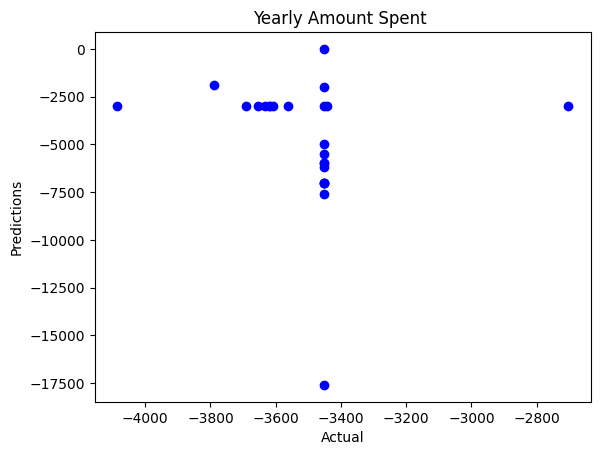

In [95]:
plt.scatter(predictions, y_test, color="blue" )
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent ')

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # type: ignore
import math

In [98]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2243.1286916165204
Mean Squared Error: 12675622.107765308
Root Mean Squared Error: 3560.2839925721246


<h4>Bad Results, will try something else then.</h4>